<h2><font color="#004D7F" size=6> Análisis de texto Tarea 3</font></h2>



<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Danyela Luengas</font><br>
<font color="#004D7F" size=3>Procesamiento de lenguaje natural o minería de textos</font><br>


    A partir del texto “El Ramo Azul”, de Octavio Paz, publicado en el libro español “Arenas movedizas” en 1949.

“El ramo azul” trata de un viajero que pasa una noche en un pueblo inquietante. La trama se centra en el diálogo que ocurre cuando un hombre débil se acerca al narrador para intentar sacarle los ojos. Lo que expone Paz, con los ojos como un símbolo, es que hay límites para la percepción.

a) ¿Cuántas palabras hay en el texto?

b) ¿Cuántas palabras diferentes existen?

c) ¿Qué cantidad de sustantivos, adjetivos y verbos posee el texto?

• Para el inciso C) puede tomarse en cuenta la ayuda de otras herramientas implementadas. Ejemplo: el servicio FreeLing: http://www.corpus.unam.mx/servicio-freeling/


In [104]:
#Lee el texto
import spacy
from spacy import displacy
from collections import Counter
!python -m spacy download es_core_news_md
nlp = spacy.load('es_core_news_md')
op = open('ElRamoAzul.txt',encoding="utf8")
tex=nlp(op.read())

     ---------------------------------------- 42.3/42.3 MB 5.4 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('es_core_news_md')


2022-12-10 12:28:01.723722: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-12-10 12:28:01.723757: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [6]:
from nltk.corpus import words
print('La cantidad de palabras del texto es: ',len(words.words()) )

La cantidad de palabras del texto es:  236736


# Las palabras repetidas

In [7]:
# las palabras repetidas 

import collections

counter = collections.Counter(tex.split())
for palabra, cont in counter.most_common():
    print(f"'{palabra}' aparece {cont} {'veces' if cont > 1 else 'vez'}.")

'de' aparece 36 veces.
'la' aparece 32 veces.
'el' aparece 18 veces.
'y' aparece 17 veces.
'un' aparece 16 veces.
'me' aparece 15 veces.
'los' aparece 15 veces.
'a' aparece 11 veces.
'que' aparece 10 veces.
'una' aparece 10 veces.
'Me' aparece 9 veces.
'con' aparece 9 veces.
'no' aparece 8 veces.
'No' aparece 8 veces.
'las' aparece 7 veces.
'se' aparece 7 veces.
'en' aparece 6 veces.
'ojos.' aparece 6 veces.
'del' aparece 5 veces.
'al' aparece 5 veces.
'entre' aparece 5 veces.
'lo' aparece 5 veces.
'mis' aparece 5 veces.
'El' aparece 4 veces.
'Al' aparece 4 veces.
'por' aparece 4 veces.
'sobre' aparece 4 veces.
'La' aparece 4 veces.
'-No' aparece 4 veces.
'acerqué' aparece 3 veces.
'Se' aparece 3 veces.
'poco' aparece 3 veces.
'mi' aparece 3 veces.
'voz' aparece 3 veces.
'le' aparece 3 veces.
'era' aparece 3 veces.
'ojos?' aparece 3 veces.
'qué' aparece 3 veces.
'te' aparece 3 veces.
'es' aparece 3 veces.
'ojos' aparece 3 veces.
'aire' aparece 2 veces.
'noche,' aparece 2 veces.
'Con' a

In [19]:
from nltk.corpus import stopwords #identifica ls cnetores 
import re
def remove_stopwords(text):    
    stopwords=set(nltk.corpus.stopwords.words("spanish"))
    for i in stopwords:
        text = re.sub(r"\b%s\b" % i, " ", text)
    return text

texto= remove_stopwords(tex)

counter = collections.Counter(texto.split())
for palabra, cont in counter.most_common():
    print(f"'{palabra}' aparece {cont} {'veces' if cont > 1 else 'vez'}.")

'Me' aparece 9 veces.
'No' aparece 8 veces.
'ojos.' aparece 6 veces.
',' aparece 5 veces.
'.' aparece 5 veces.
'El' aparece 4 veces.
'Al' aparece 4 veces.
'La' aparece 4 veces.
'-No' aparece 4 veces.
'acerqué' aparece 3 veces.
'Se' aparece 3 veces.
'voz' aparece 3 veces.
'ojos?' aparece 3 veces.
'ojos' aparece 3 veces.
'aire' aparece 2 veces.
'noche,' aparece 2 veces.
'Con' aparece 2 veces.
'vuelta.' aparece 2 veces.
'Y' aparece 2 veces.
'Alcé' aparece 2 veces.
'Caminé' aparece 2 veces.
'Encendí' aparece 2 veces.
'tanta' aparece 2 veces.
'Mis' aparece 2 veces.
'sino' aparece 2 veces.
'aquel' aparece 2 veces.
'palabra' aparece 2 veces.
'sentía' aparece 2 veces.
'sentí' aparece 2 veces.
'puerta.' aparece 2 veces.
'señor' aparece 2 veces.
'aquí' aparece 2 veces.
'Te' aparece 2 veces.
'daré' aparece 2 veces.
'señor.' aparece 2 veces.
'azules,' aparece 2 veces.
'azules.' aparece 2 veces.
'rostro.' aparece 2 veces.
'machete' aparece 2 veces.
'llama' aparece 2 veces.
'mano' aparece 2 veces.
'

# Cantidad de sustantivos, adjetivos y verbos 


Etiquetado de Parte de Oración (Etiquetado Penn Treebank)
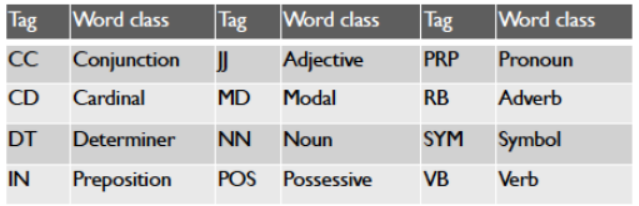

In [107]:
import nltk
import numpy as np
import pandas as pd 
tex2 = nltk.word_tokenize(texto)
b=nltk.pos_tag(tex2)
ss=list(s)
df=pd.DataFrame(b, columns=['texto', 'tipo'])
df

,texto,tipo
0,El,NNP
1,ramo,NN
2,azul,NN
3,",",","
4,cuento,NN
...,...,...
673,siguiente,NN
674,huí,NN
675,aquel,NN
676,pueblo,NN


In [77]:
#cantidad de sustantivos, adjetivos y verbos 
df['tipo']
        
freq = df.groupby(['tipo']).count() 
freq

,texto
tipo,
",",59
.,105
:,4
CC,2
DT,9
FW,13
IN,4
JJ,74
MD,1


In [72]:
#Método 1
print('La Cantindad de sustativos de texto es:',len(df[df['tipo']=='NN']))
print('La Cantindad de verbos de texto es:',len(df[df['tipo']=='VB']))
print('La Cantindad de Adjetivos de texto es:',len(df[df['tipo']=='JJ']))

La Cantindad de sustativos de texto es: 281
La Cantindad de verbos de texto es: 3
La Cantindad de Adjetivos de texto es: 74


In [105]:
#Método 2
for token in tex:
    print(token.lemma_, token.pos_, token.dep_)


el DET det
ramo NOUN nsubj
azul ADJ amod
, PUNCT punct
uno DET det
cuento NOUN appos
de ADP case
Octavio PROPN nmod
Paz PROPN flat


 SPACE dep
Desperté PROPN ROOT
, PUNCT punct
cubierto ADJ obj
de ADP case
sudor NOUN obl
. PUNCT punct
del ADP case
piso NOUN obl
de ADP case
ladrillo NOUN nmod
rojo ADJ amod
, PUNCT punct
recién ADV advmod
regado ADJ amod
, PUNCT punct
subir VERB ROOT
uno DET det
vapor NOUN obj
caliente ADJ amod
. PUNCT punct
uno DET det
mariposa NOUN nsubj
de ADP case
ala NOUN nmod
grisácea ADJ amod
revolotear VERB ROOT
encandilado ADJ obj
alrededor ADV advmod
del ADP case
foco NOUN obl
amarillento ADJ amod
. PUNCT punct
saltar VERB ROOT
de ADP case
el DET det
hamaca NOUN obl
y CCONJ cc
descalzo PROPN conj
atravesé PROPN obj
el DET det
cuarto NOUN obj
, PUNCT punct
cuidar VERB advcl
no ADV advmod
pisar VERB xcomp
alguno DET det
alacrán NOUN obj
salido ADJ amod
de ADP case
su DET det
escondrijo VERB obl
a ADP mark
tomar VERB advcl
el DET det
fresco NOUN obj
. PUNCT punct

más ADV fixed
ir AUX aux
a ADP mark
sacar él VERB ROOT
el DET det
ojo NOUN obj
. PUNCT punct

 SPACE dep
-Pero CCONJ advmod
, PUNCT punct
¿ PUNCT punct
para ADP case
qué PRON obl
querer VERB ROOT
mi DET det
ojo NOUN nsubj
? PUNCT punct

 SPACE dep
-ser AUX cop
uno DET det
capricho NOUN ROOT
de ADP case
mi DET det
novia NOUN nmod
. PUNCT punct
querer VERB ROOT
uno DET det
ramito NOUN obj
de ADP case
ojo NOUN nmod
azul ADJ amod
y CCONJ cc
por ADP case
aquí ADV advmod
haber AUX conj
poco PRON obj
que PRON nsubj
él PRON obj
tener VERB acl
. PUNCT punct

 SPACE dep
mi DET det
ojo NOUN nsubj
no ADV advmod
tú PRON iobj
servir VERB ROOT
. PUNCT punct
no ADV advmod
ser AUX cop
azul ADJ ROOT
, PUNCT punct
sino CCONJ cc
amarillo NOUN conj
. PUNCT punct

 SPACE dep
-ay AUX nmod
, PUNCT punct
señor NOUN nsubj
no ADV advmod
querer VERB aux
engañar yo VERB ROOT
. PUNCT punct
bien ADV advmod
saber VERB ROOT
que SCONJ mark
él PRON obj
tener VERB ccomp
azul ADJ obj
. PUNCT punct

 SPACE dep
-no ADV advm

In [95]:
adjs = []
for token in tex:
    if token.pos_ == 'ADJ':
        adjs.append(token.lemma_)
cantidad_adjs = Counter(adjs)
print('la cantidad de adjetivos es: ', len(cantidad_adjs))
cantidad_adjs


la cantidad de adjetivos es:  56


Counter({'azul': 6,
         'cubierto': 1,
         'rojo': 1,
         'regado': 1,
         'caliente': 2,
         'grisácea': 1,
         'encandilado': 1,
         'amarillento': 1,
         'salido': 1,
         'enorme': 1,
         'femenino': 1,
         'empapado': 1,
         'escondido': 1,
         'pintado': 1,
         'verde': 1,
         'tuerto': 1,
         'reticente': 1,
         'sentado': 2,
         'entrecerrado': 1,
         'ronco': 1,
         'cerrado': 1,
         'alumbrado': 1,
         'vuelvo': 1,
         'oscuro': 1,
         'empedrado': 1,
         'negro': 1,
         'blanco': 1,
         'desmoronado': 1,
         'ciego': 1,
         'lleno': 1,
         'alto': 1,
         'vasto': 1,
         'inmenso': 1,
         'disperso': 1,
         'luminoso': 1,
         'breve': 1,
         'minúsculo': 1,
         'largo': 1,
         'libre': 1,
         'seguro': 1,
         'dulce': 1,
         'suave': 1,
         'apenado': 1,
         '-¿mi':

In [103]:
nouns = []
for token in tex:
    if token.pos_ == 'NOUN':
        nouns.append(token.lemma_)
print('la cantidad de sustantivos es: ', len(cantidad_nouns))
cantidad_nouns = Counter(nouns)
cantidad_nouns

la cantidad de sustantivos es:  134


Counter({'ramo': 1,
         'cuento': 1,
         'sudor': 1,
         'piso': 1,
         'ladrillo': 1,
         'vapor': 1,
         'mariposa': 1,
         'ala': 1,
         'foco': 1,
         'hamaca': 1,
         'cuarto': 1,
         'alacrán': 1,
         'fresco': 1,
         'ventanillo': 1,
         'aire': 2,
         'campo': 2,
         'respiración': 1,
         'noche': 3,
         'centro': 1,
         'habitación': 1,
         'agua': 1,
         'jarra': 1,
         'palangana': 1,
         'peltre': 1,
         'toalla': 1,
         'torso': 1,
         'pierna': 1,
         'trapo': 1,
         'bicho': 1,
         'pliegue': 1,
         'ropa': 1,
         'escalera': 1,
         'puerta': 3,
         'mesón': 2,
         'dueño': 2,
         'sujeto': 1,
         'sillita': 1,
         'tule': 1,
         'ojo': 14,
         'voz': 3,
         'señor': 6,
         'vuelta': 2,
         'calor': 1,
         'hombro': 1,
         'principio': 1,
         'tienta

In [102]:
verbos = []
for token in tex:
    if token.pos_ == 'VERB':
        verbos.append(token.lemma_)
cantidad_verbos = Counter(verbos)
print('la cantidad de verbos es: ', len(cantidad_verbos))
cantidad_verbos 

la cantidad de sustantivos es:  107


Counter({'subir': 1,
         'revolotear': 1,
         'saltar': 2,
         'cuidar': 1,
         'pisar': 1,
         'escondrijo': 1,
         'tomar': 1,
         'acercar': 4,
         'aspiré': 1,
         'oir': 1,
         'regresar': 1,
         'vacier': 1,
         'frotar': 1,
         'secar': 1,
         'cerciorar yo': 1,
         'vestí': 1,
         'calcar': 1,
         'bajar': 1,
         'tropezar': 1,
         'fumar': 1,
         'preguntar': 2,
         'ir': 1,
         'dar': 3,
         'hacer': 3,
         'valer': 1,
         'quedar él': 1,
         'alzar': 2,
         'musitar': 1,
         'meter': 1,
         'ver': 4,
         'caminar': 2,
         'encendí': 1,
         'salir': 1,
         'iluminar': 1,
         'detener': 2,
         'sopló': 1,
         'respiré': 1,
         'vibrar': 1,
         'vivaquear': 1,
         'alcé': 1,
         'establecer': 1,
         'pensar': 1,
         'decir': 4,
         'tirar': 1,
         'caer': 2,
   